In [22]:
%matplotlib inline
import pyximport

import sys
import os
sys.path.insert(0,os.path.join(os.getcwd(),os.pardir))
from qutip import *
import numpy as np
pyximport.install(setup_args={"include_dirs":np.get_include()})
import matplotlib.pyplot as plt
import LH_tools as LHT
import dorit.XXZZham as XXZZham
from dorit.XXZZham import add_high_energies, rotate_to_00_base
import random
import adiabatic_sim as asim

In [37]:
n = 3
terms = []
for i in range(1, n+1):
    for j in range(i + 1, n+1):
        a = random.uniform(-10, 10)
        terms.append(XXZZham.XXZZ_term(i, j, a))

H = XXZZham.XXZZham(terms)
H_com = H.get_commuting_term_ham()
H_high_energies = add_high_energies(rotate_to_00_base(H_com),30)

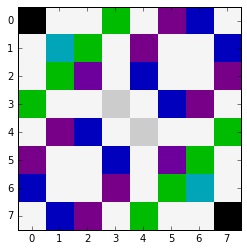

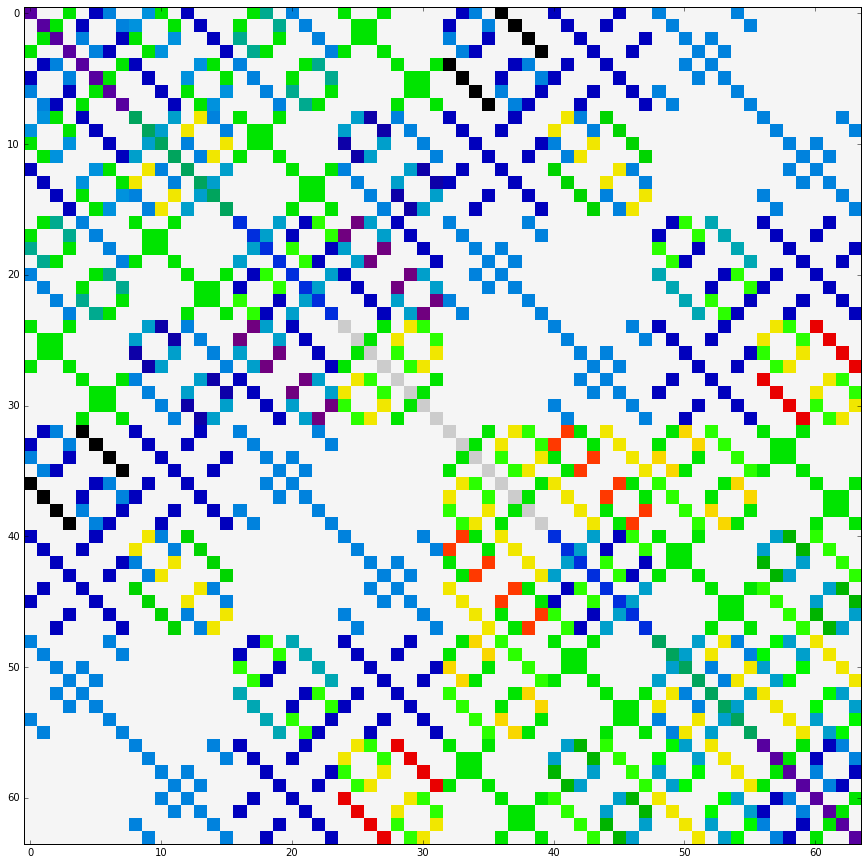

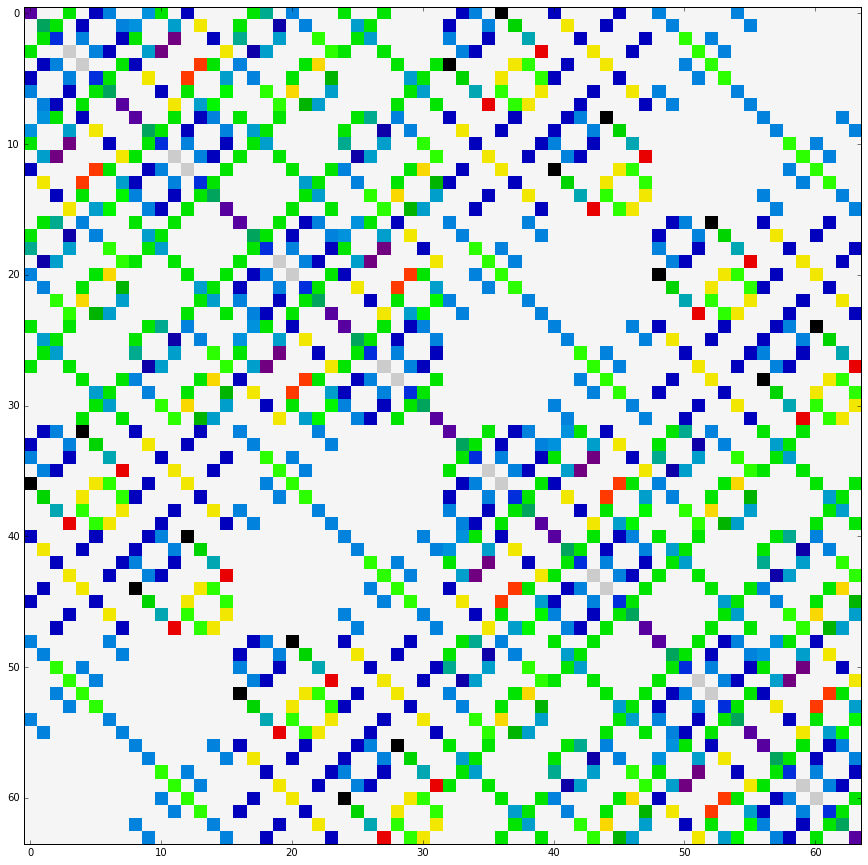

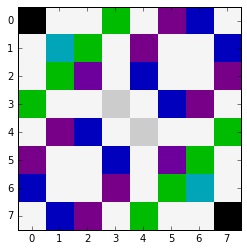

In [82]:
LHT.plot_operator(H.get_ham())
plt.figure(figsize=(15, 15))
com_ham = H.get_commuting_term_ham()
LHT.plot_operator(com_ham)
plt.figure(figsize=(15, 15))
LHT.plot_operator(rotate_to_00_base(com_ham))
plt.figure()
hamsize = H.get_ham().shape[0]
LHT.plot_operator(Qobj(rotate_to_00_base(com_ham)[0:hamsize,0:hamsize]))
pass

In [25]:
h_t= [[H_com,'(t_max-t)/t_max'],
      [H_high_energies, 't/t_max']]

In [26]:
in_state = H_com.eigenstates(eigvals=1)[1][0]

Computation time 2.0469112396240234 seconds :


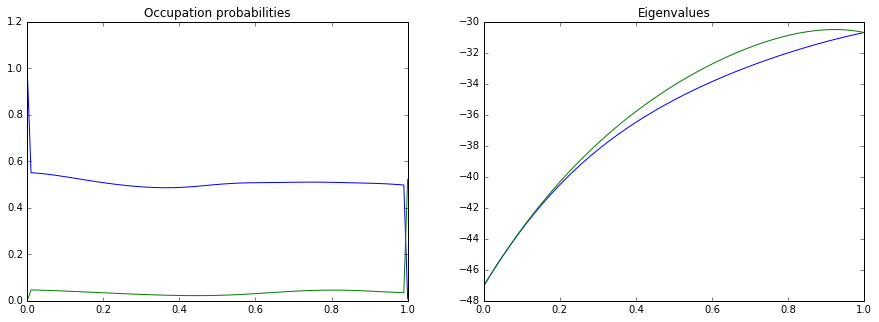

In [27]:
LHT.benchmark(h_t, in_state,100,1)
pass

/home/yonatan/anaconda3/envs/qutip/lib/python3.5/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:247: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)
/home/yonatan/anaconda3/envs/qutip/lib/python3.5/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:165: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  'is in the CSC matrix format', SparseEfficiencyWarning)


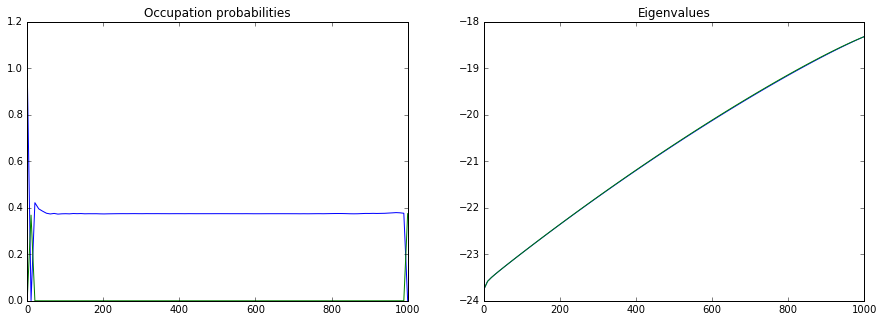

In [23]:
tlist = np.linspace(0,1000,100)
P_mat,ev_mat,psi = asim.sim_simple_adiabatic(tlist,H_com,H_high_energies)

LHT.plot_PandEV(P_mat,ev_mat,tlist)
pass

In [28]:
H = hadamard_transform(n*2)

In [29]:
rot_h_com = H * H_com * H

In [30]:
h_t_with_rot= [[rot_h_com,'(t_max-t)/t_max'],
      [H_high_energies, 't/t_max']]
in_state = rot_h_com.eigenstates(eigvals=1)[1][0]

Computation time 2.153451919555664 seconds :


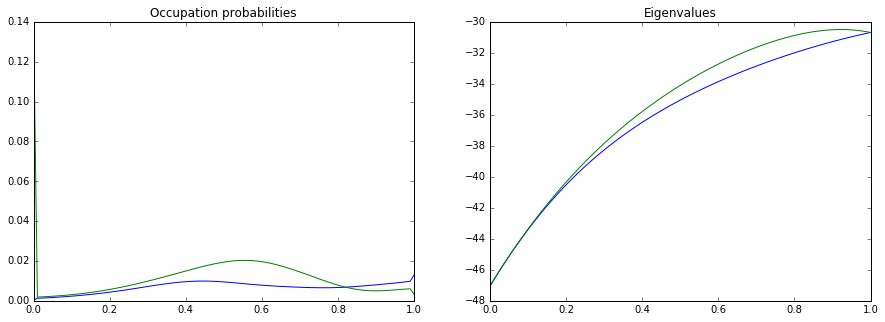

In [32]:
LHT.benchmark(h_t_with_rot, in_state,100,1)
pass

# Check that the expectation stays 

In [53]:
H_ham = H.get_ham()

In [67]:
len(rand_psi.dims[0])

3

In [68]:
rand_psi =  rand_ket(2**n,dims = [[2, 2, 2], [1, 1, 1]])
print(expect(H.get_ham(),rand_psi))
rand_psi_0n = tensor(rand_psi,tensor([basis(2,0)] * len(rand_psi.dims[0])))
print(expect(H.get_commuting_term_ham(),rand_psi_0n))
                     

-7.116468015774078
-7.116468015774078


Indead the expectation stays !